# Algorytmy rozpoznawania twarzy „feature-based”

Najprostsze algorytmy detekcji twarzy opierają się na znajdowaniu prostych wzorców geometrycznych o wysokim kontraście (ciemne i jasne plamy). Po raz pierwszy algorytm wykorzystujący takie rozwiązanie został zaproponowany przez Paula Violę i Michaela Jonesa w 2001 roku. W literaturze bywa nazywany klasyfikatorem kaskadowym wykorzystującym cechy Haara. Viola i Jones jako przykład podali następujące cechy:
![title](images/oryginalne_cechy.jpg)




Można wykorzystywać też inne proste szablony, istotna jest łatwość z jaką można je odnaleźć na obrazie.
![title](images/Cechy_haaro-podobne.jpg)

Sprawdzanie czy dany obszar posiada daną cechę jest wykonywane poprzez obliczanie różnicy sumy poziomów szarości pikselów pokrywanych przez biały oraz czarny prostokąt oraz sumy poziomów szarości pikseli pokrywanych przez czarny prostokąt.
Ponieważ powtarzanie operacji obliczania wartości cechy haaro-podobnej przez sumowanie poziomów szarości obrazu doprowadziłoby do znacznego wydłużenia procesu detekcji Viola wprowadził pojęcie obrazu scałkowanego. 
Operacje scałkowania obrazu polega na obliczeniu funcji SAT oraz RAST dla współrzędnych każdego piksela, dzięki czemu suma poziomów jasności pikseli obejmujących dowolny prostokątny obszar może być obliczana w stałym czasie, ponieważ zawiera po dwie operacje dodawania oraz odejmowania.

Warto zwrócić uwagę, iż tylko niektóre obliczone cechy mają znaczenie, aby wykryć twarz. Przykładowo na poniższym rysunku, największe znaczenie mają wyszczególnione cechy:
![title](images/Przyklad_wykorzystania.jpg)

Ażeby wybrać najbardziej znaczące cechy wykorzystuje się algorytm Adaboost. Boosting polega na tym, iż nakładamy poszczególne cechy na obrazy, trenujemy klasyfikator oraz sprawdzamy jaki błąd wystąpił. Ten klasyfikator, który otrzymał wynik z najmniejszym błędem zostaje wybrany do dalszego treningu. Operacje taką powtarzamy, aż osiągniemy wymaganą dokładność.

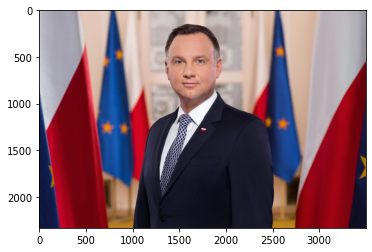

In [2]:
#displaying a picture
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/0152.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [2]:
#example eye classifier
eye_cascade = cv.CascadeClassifier('features/haarcascade_eye.xml')
img = cv.imread('images/prezydent.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
face_cascade = cv.CascadeClassifier('features/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

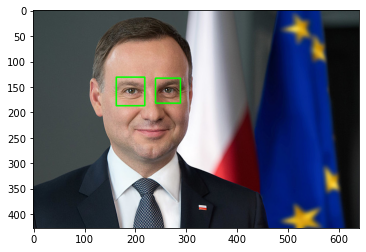

In [3]:
for (ex,ey,ew,eh) in eyes:
    cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [5]:
#face classifier
face_cascade = cv.CascadeClassifier('features/haarcascade_frontalface_default.xml')

img = cv.imread('images/facerecognition1.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

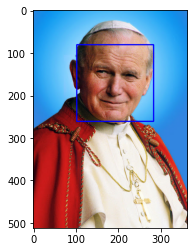

In [6]:
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [7]:
img = cv.imread('images/malysz2.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

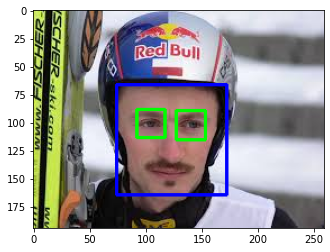

In [9]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [10]:
#group picture
img = cv.imread('images/krolewska4.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

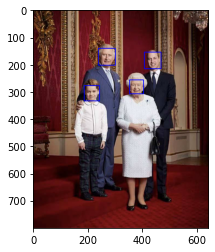

In [11]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Rozpoznawanie twarzy metodą MTCNN

# Rozpoznawanie twarzy za pomocą wielozadaniowych, kaskadowych głębokich sieci neuronowych. 
Zadanie rozpoznania twarzy odbywa się w 3 etapach, gdzie do każdego użyta jest inna sieć. Dzięki używaniu na początku słabszych a następnie coraz mocniejszych sieci można pogodzić dokładność z wydajnością. Z początku mniej dokładne sieci wyznaczają dużo potencjalnych kandydatów(okien), a następne dokładniejsze sieci skupiają się tylko na tych kandydatach, eliminując znaczną ich część, nie musząc przy tym wykonywać tak dużej ilości obliczeń, jakie musiałyby wykonać sprawdzając wszystkie możliwe okna. 
W pierwszym etapie, użyta jest prosta sieć(Proposal Network), która służy do wydajnego wyznaczenia okien-kandydatów - oraz określenia rozmiarów tych okien. Następnie za pomocą metody NMS(służącej do wykrywania krawędzi) najbardziej nachodzące na siebie okna zostają ze sobą złączone. 
 
 ![xd1.png](attachment:xd1.png)
 
Następnie kolejna sieć(Refine Network) spośród uzyskanych wcześniej okien odrzuca znaczną część, poprzez dokładniejsze sprawdzenie okien, następnie dzięki NMS złącza się nachodzących kandydatów.  
![zdj2.png](attachment:zdj2.png)
 
Na samym końcu użyta jest najmocniejsza, podobna do poprzedniej, sieć(Output Network), która dokonuje ostatecznego wyboru, dodatkowo oznaczając 5 specyficznych elementów twarzy - nos, oczy, oraz oba kąciki ust. 
![z3.png](attachment:z3.png)


In [28]:
from mtcnn import MTCNN



detector = MTCNN()

#print(outp)
color = (255, 0, 0)
color2 = (0, 255, 0) 
radius = 3
thickness = 5

def draw(outps,img):
    for outp in outps:
        (x,y,w,h) = outp['box']
        img = cv.rectangle(img, (x,y),(x+w,y+h), color, thickness)
        for keypoint in 'left_eye','right_eye','nose','mouth_left','mouth_right': #zaznaczanie istotnych punktow twarzy
            (x,y) = outp['keypoints'][keypoint]
            img = cv.circle(img, (x,y), radius, color2, thickness )    
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


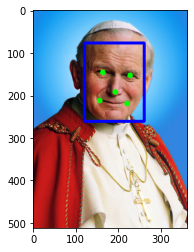

In [29]:
img = cv.imread("images/facerecognition1.jpg")
outp = detector.detect_faces(img) # detekcja
draw(outp,img)

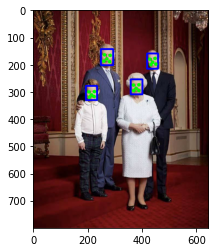

In [30]:
img2 = cv.imread("images/krolewska4.jpg")
outp2= detector.detect_faces(img2)
draw(outp2,img2)

Bibliografia:
"Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks"
Kaipeng Zhang, Zhanpeng Zhang, Zhifeng Li, Senior Member, IEEE, and Yu Qiao, Senior Member, IEEE : 
https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf 

https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

http://opencvpopolsku.blogspot.com/2014/02/wykrywanie-twarzy-w-opencv.html

https://www.robotyka.ia.pw.edu.pl/papers/pwilkowski-msc-09-twiki.pdf